In [3]:
# 1 выгрузка данных

import pandas as pd
import numpy as np
import os
os.chdir("/Users/kruto/Desktop/мо/мо дата")
data = pd.read_csv('day.csv', sep=",", header = 0, index_col=False)

In [4]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


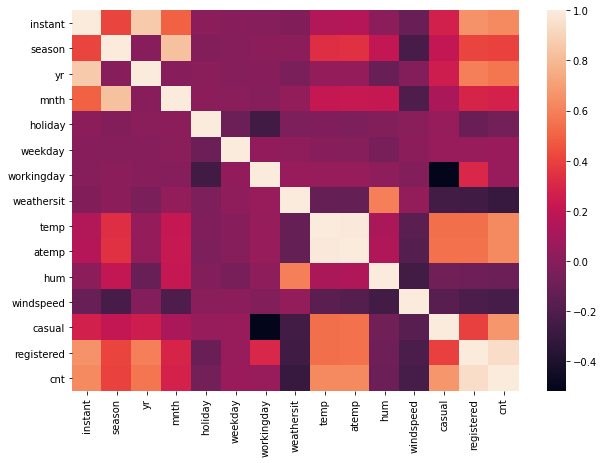

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(data.corr())

### Визуализация данных

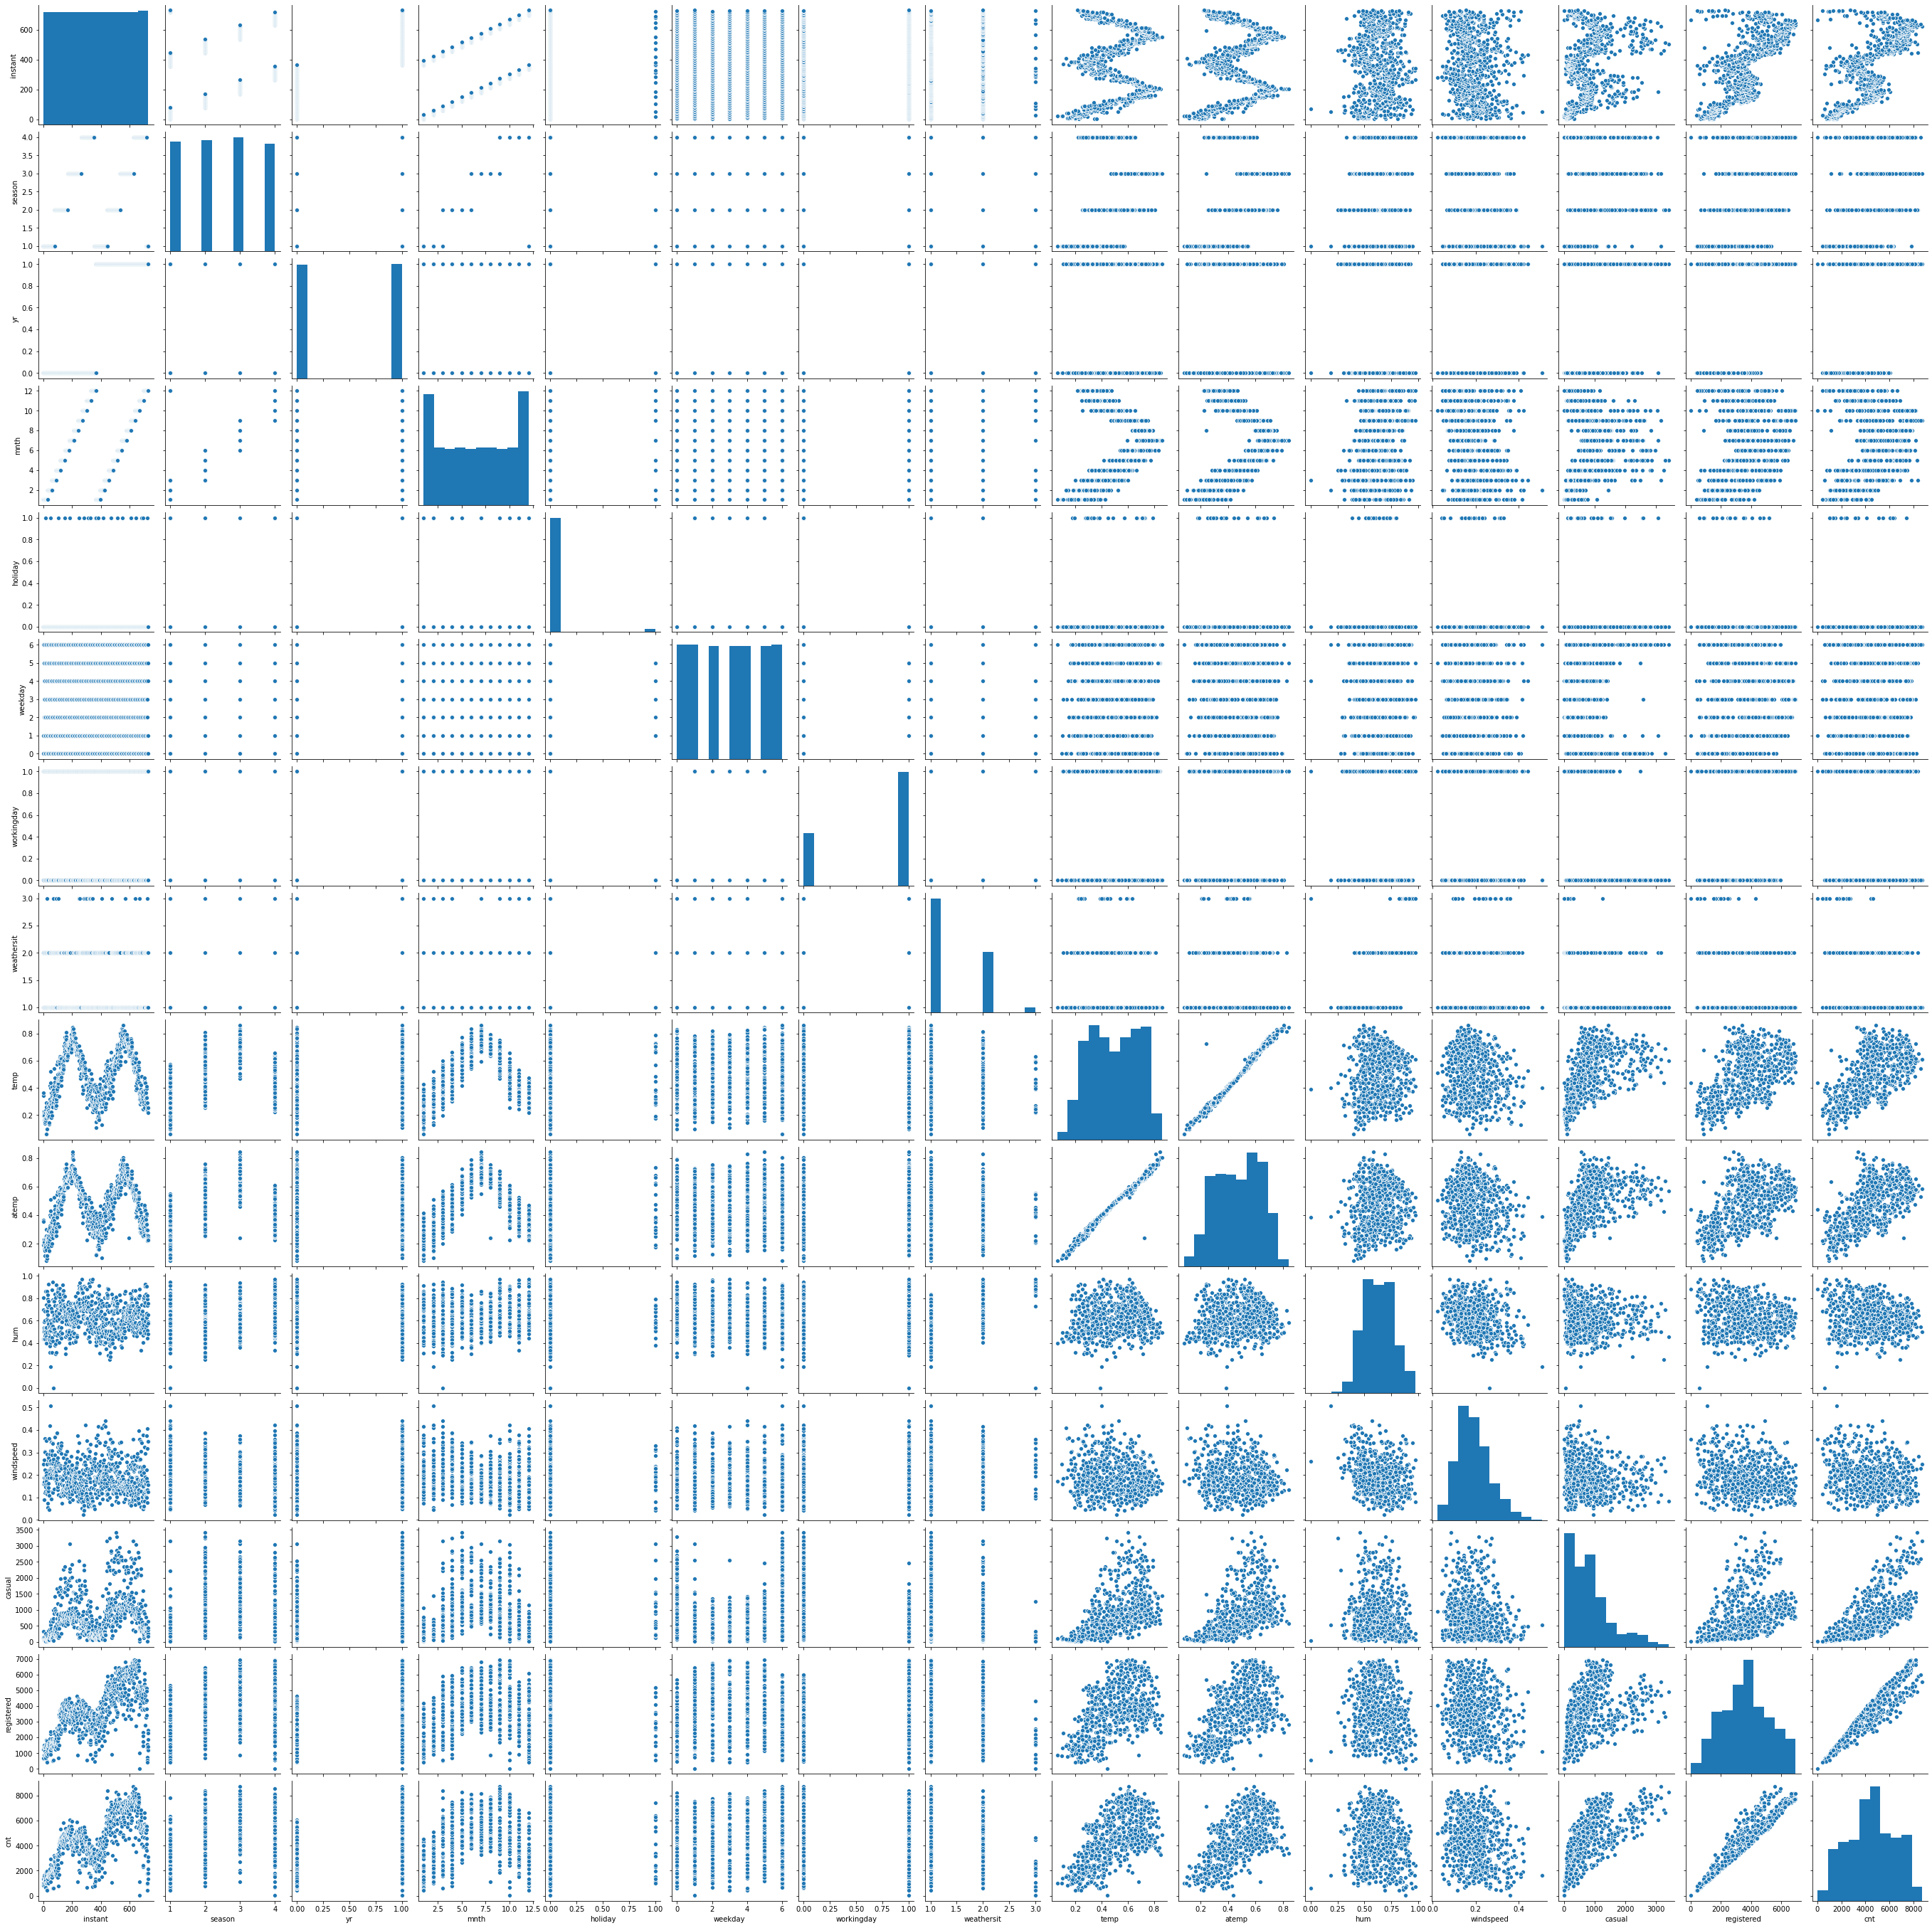

In [8]:
sns.pairplot(data)

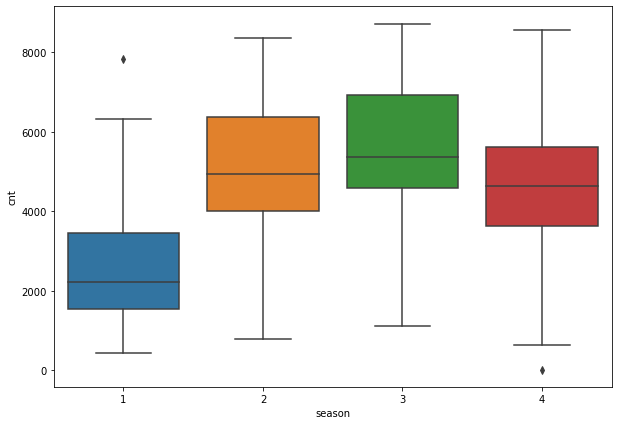

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(x='season', y='cnt', data=data)

### 4) Разделяем данные

In [10]:
del data['dteday']

In [11]:

X = data.drop('cnt', axis=1)
y = data['cnt']

### 5) Разбиваем выборку в соотношении 70 на 30

In [13]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 6) Стандартизация X

In [14]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Написать функцию обучения модели и вывода MSE, coef, R^2

In [15]:
## я пишу отдельные функции для каждой модели тк там присутсвтуют некоторые отличия в параметрах

In [16]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [17]:
# Ridge Regression

def ridge_regression(X_train, y_train, X_test, y_test, alpha):

    ridge = Ridge(alpha,  normalize = True)
    ridge.fit(X_train, y_train)
    pred = ridge.predict(X_test)
    ridge_mse = mean_squared_error(y_test, pred)
    r2 = ridge.score(X, y, sample_weight=None)
    
    coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [ridge.intercept_] + ridge.coef_.tolist()),
                    columns=['predictor', 'coef'])
    return  ridge_mse, r2, coef  


alpha =4

print("Ridge  mse, R^2 and coef for alpha=" + str(alpha) +": " + str(ridge_regression(X_train, y_train, X_test, y_test, alpha)))        
        
        
        

Ridge  mse, R^2 and coef for alpha=4: (1394990.8079569167, 0.6501602211833073,      predictor         coef
0    intercept  2557.894617
1      instant     0.685150
2       season    79.059844
3           yr   279.357634
4         mnth    14.204416
5      holiday  -116.621380
6      weekday    10.660823
7   workingday    55.621493
8   weathersit  -137.423689
9         temp   813.868210
10       atemp   928.404009
11         hum  -214.861463
12   windspeed  -695.431266
13      casual     0.258220
14  registered     0.169645)


In [18]:
##http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html

In [19]:
def ridgeCV_regression(X_train, y_train, X_test, y_test, alphas = 10**np.linspace(10,-2,100)*0.5):
    ridgecv = RidgeCV(alphas = alphas,  normalize = True)
    ridgecv.fit(X_train, y_train)
    alpha = ridgecv.alpha_
    
    ridge1 = Ridge(alpha,  normalize = True)
    ridge1.fit(X_train, y_train)
    pred = ridge1.predict(X_test)
    ridge1_mse = mean_squared_error(y_test, pred)
    r2 = ridge1.score(X, y, sample_weight=None)
    coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [ridge1.intercept_] + ridge1.coef_.tolist()),
                            columns=['predictor', 'coef'])
    
    return alpha, ridge1_mse, r2, coef 


alpha = ridgeCV_regression(X_train, y_train, X_test, y_test)[0]
print("RidgeCV:  mse, R^2 and coef for alpha =" + str(alpha) +": " + str(ridgeCV_regression(X_train, y_train, X_test, y_test)))        
        

        

RidgeCV:  mse, R^2 and coef for alpha =0.005: (0.005, 293.5548167654703, 0.99992346338862,      predictor       coef
0    intercept  15.544836
1      instant   0.016336
2       season  11.554526
3           yr  36.866557
4         mnth  -1.228313
5      holiday  -3.795241
6      weekday   1.070276
7   workingday  22.654720
8   weathersit -12.068305
9         temp  12.987903
10       atemp  81.445865
11         hum -13.517004
12   windspeed -33.902790
13      casual   0.997459
14  registered   0.975242)


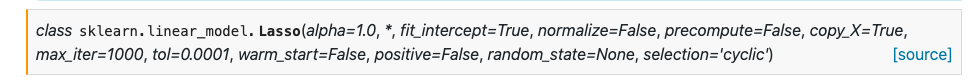

In [20]:
def lasso_regression(X_train, y_train, X_test, y_test, alpha, normalize=True):
    lasso = Lasso(alpha, max_iter=1000, normalize = True)
    lasso.fit(X_train, y_train)
    pred = lasso.predict(X_test)
    lasso_mse = mean_squared_error(y_test, pred)
    r2 = lasso.score(X, y, sample_weight=None)
    
    coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [lasso.intercept_] + lasso.coef_.tolist()),
                    columns=['predictor', 'coef'])

    
    
    return  lasso_mse, r2, coef 
alpha = 4
print("Lasso:  mse, R^2 and coef for alpha =" + str(alpha) +": " + str(lasso_regression(X_train, y_train, X_test, y_test, alpha)))        


Lasso:  mse, R^2 and coef for alpha =4: (12331.183473828536, 0.9967912181813053,      predictor        coef
0    intercept  240.574242
1      instant    0.000000
2       season    0.000000
3           yr    0.000000
4         mnth    0.000000
5      holiday   -0.000000
6      weekday    0.000000
7   workingday   -0.000000
8   weathersit   -0.000000
9         temp    0.000000
10       atemp    0.000000
11         hum   -0.000000
12   windspeed   -0.000000
13      casual    0.906584
14  registered    0.956971)


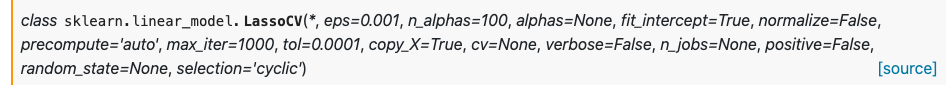

In [21]:
def lassoCV_regression(X_train, y_train, X_test, y_test, normalize=True):
    lassocv = LassoCV(n_alphas = 10, eps = 1e-3,max_iter = 1000,  normalize = True)
    lassocv.fit(X_train, y_train)
    
    lasso = Lasso(lassocv.alpha_)
    lasso.fit(X_train, y_train)
    pred = lasso.predict(X_test)
    lasso_mse = mean_squared_error(y_test, pred)
    r2 = lasso.score(X, y, sample_weight=None)
    
    coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [lasso.intercept_] + lasso.coef_.tolist()),
                    columns=['predictor', 'coef'])

    
    
    return  lasso_mse, r2, coef, lassocv.alpha_


l_mse, alpha = lassoCV_regression(X_train, y_train, X_test, y_test)[0],lassoCV_regression(X_train, y_train, X_test, y_test)[3]
print("LassoCV:  mse, R^2 and coef for alpha =" + str(alpha) +": " + str(lassoCV_regression(X_train, y_train, X_test, y_test)))        


LassoCV:  mse, R^2 and coef for alpha =0.0792933128670078: (1.8402958120611154e-05, 0.9999999999936334,      predictor      coef
0    intercept  0.002518
1      instant -0.000024
2       season -0.000000
3           yr -0.000000
4         mnth -0.000000
5      holiday  0.000000
6      weekday -0.000000
7   workingday -0.000000
8   weathersit  0.000000
9         temp -0.000000
10       atemp -0.000000
11         hum  0.000000
12   windspeed  0.000000
13      casual  0.999995
14  registered  1.000003, 0.0792933128670078)


In [22]:

r_mse, r_r2 = ridge_regression(X_train, y_train, X_test, y_test, alpha=4)[0], ridge_regression(X_train, y_train, X_test, y_test, alpha=4)[1]
rcv_mse, rcv_r2 = ridgeCV_regression(X_train, y_train, X_test, y_test)[1], ridgeCV_regression(X_train, y_train, X_test, y_test)[2]
l_mse, l_r2 = lasso_regression(X_train, y_train, X_test, y_test, alpha=4)[0], ridge_regression(X_train, y_train, X_test, y_test, alpha=4)[1]
lcv_mse, lcv_r2 = ridgeCV_regression(X_train, y_train, X_test, y_test)[1], ridgeCV_regression(X_train, y_train, X_test, y_test)[2]

df = pd.DataFrame({"Model":['Ridge', 'RidgeCV', 'Lasso', 'LassoCV'],'MSE': [r_mse, rcv_mse,l_mse,lcv_mse], 'R^2': [r_r2, rcv_r2, l_r2, lcv_r2]})

In [23]:
df

,Model,MSE,R^2
0,Ridge,1.394991e+06,0.650160
1,RidgeCV,2.935548e+02,0.999923
2,Lasso,1.233118e+04,0.650160
3,LassoCV,2.935548e+02,0.999923


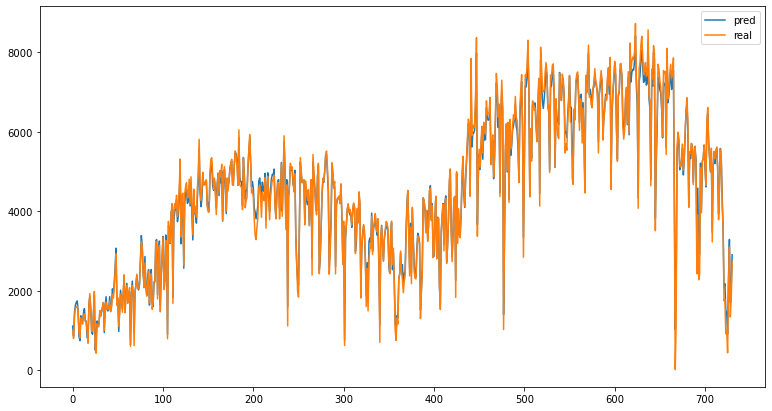

In [24]:
model_1 =Ridge(alpha,  normalize = True)
model_1.fit(X_train, y_train) 

pred = pd.DataFrame({
    'pred': model_1.predict(X),
    'real': y})

pred.plot(figsize=(13,7))

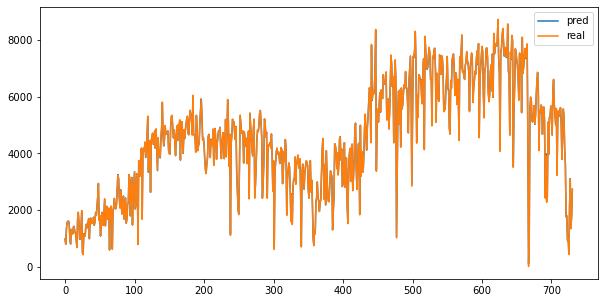

In [25]:
model_2 = RidgeCV(alphas = 10**np.linspace(10,-2,100)*0.5,  normalize = True)

model_2.fit(X_train, y_train) 


pred = pd.DataFrame({
    'pred': model_2.predict(X),
    'real': y})

pred.plot(figsize=(10,5))

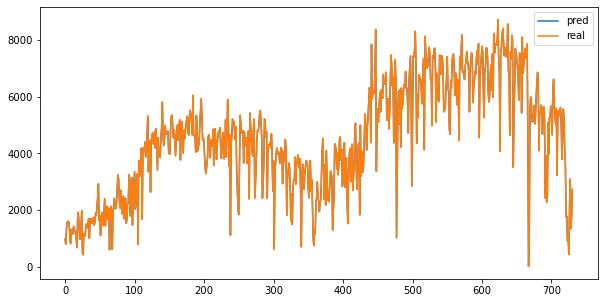

In [26]:
model_1 = Lasso(alpha, max_iter=1000, normalize = True)
model_1.fit(X_train, y_train) 

pred = pd.DataFrame({
    'pred': model_1.predict(X),
    'real': y})

pred.plot(figsize=(10,5))

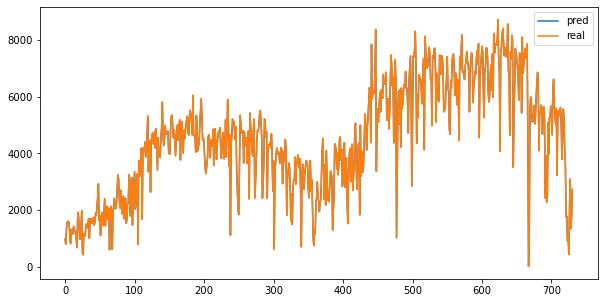

In [27]:
model_4 = LassoCV(n_alphas = 10, eps = 1e-3,max_iter = 1000,  normalize = True)
model_4.fit(X_train, y_train) 


pred = pd.DataFrame({
    'pred': model_4.predict(X),
    'real': y})

pred.plot(figsize=(10,5))

In [ ]:
# линейная регрессия

In [33]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)


lModel = LinearRegression()

lModel.fit(X_train, y_train)

preds = lModel.predict(X_test)


In [34]:
from sklearn.metrics import r2_score

lmodel_mse = mean_squared_error(y_test, preds)
print(lmodel_mse, r2_score(y_test, preds))

1.6546729255640966e-24 1.0


In [ ]:
# random forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

rfModel.fit(X_train, y_train)
preds = rfModel.predict(X_test)
#print ("RMSLE Value For Random Forest: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

rfModel_mse = mean_squared_error(y_test, preds)
print(rfModel_mse, r2_score(y_test, preds))

9769.23440863637 0.9975447806741928
